# Logistic Regression from scratch: Dogs vs. Cats

The following code is my own implementation of logistic regression inspired from Coursera's deep learning specialization. Aside from the mathematical formulations, which follow Andrew Ng's notation, but nonetheless cannot be copyrighted, the contents of this notebook are product of original work, as a way to apply my knowledge acquired through the course. All rights reserved. 

## Imports

In [1]:
# Mount the google drive for the dataset 
from google.colab import drive
drive.mount('/content/drive') 
"""
4/sgHaKtMTGqfhccKVyUf1I2jMOFAEczj9b_gBKi5A2BHfDbtr-alpuPM
"""

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'\n4/sgHaKtMTGqfhccKVyUf1I2jMOFAEczj9b_gBKi5A2BHfDbtr-alpuPM\n'

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import cv2
import sys
import time
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
from PIL import Image
from tqdm import tqdm_notebook
from IPython.display import Image
from sklearn.datasets import load_files   
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
from urllib.request import urlopen,urlretrieve

## Loading the data 
We will now use load the dataset , organize it and parse it so we can feed it to the algorithm, and also randomize it. 

In [4]:
!unzip "./drive/My Drive/Colab Notebooks/Data/cats_vs_dogs.zip" -d "./"

Streaming output truncated to the last 5000 lines.
  inflating: ./cats_vs_dogs/training_set/cats/cat.3701.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3702.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3703.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3704.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3705.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3706.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3707.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3708.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3709.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.371.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3710.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3711.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3712.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3713.jpg  
  inflating: ./cats_vs_dogs/training_set/cats/cat.3714.jpg  
  inflating: ./cats_vs_dogs/trainin

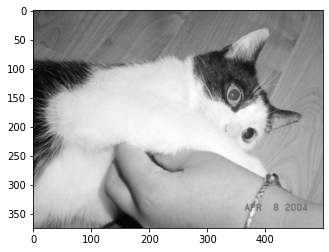

In [5]:
# Visualize an image 
train_cats_path = "./cats_vs_dogs/training_set/cats" 
i = 0 
for img in os.listdir(train_cats_path):  
  img_array = cv2.imread(os.path.join(train_cats_path,img), cv2.IMREAD_GRAYSCALE) 
  plt.imshow(img_array, cmap="gray") 
  plt.show()
  break

## Creating the training and testing datasets
We will now label the data accordingly. We will first create a function to resize all our images to the same dimensions (64,64), and then append a label to them. We will define the labels as: 
  - dog = 0
  - cat = 1

In [0]:
# define paths
train_path = "./cats_vs_dogs/training_set/" 
test_path = "./cats_vs_dogs/test_set/" 
img_size = 64

In [0]:
# resize all training examples 
def prepare_data(path, img_size, extra_dim=False): 
  """
  Loops through the corresponding path adjusting the images accordingly. 
  @args: 
    	- paths: directory paths in which the images are contained 
      - label: label to attach to all images (should be a number )
      - img_size: resize img dimensions to (img_size,img_size)
  """
  processed_data = []

  try: 
    # loop through all input folders in path 
    for folder in os.listdir(path): 
      print(folder)
      if str(folder) not in ["cats","dogs"] : 
        print("skipping...")
        continue
      # obtain current folder  directory 
      images_path = os.path.join(path,folder)
      print(images_path)
      # loop through all imgs in input directory 
      for img in os.listdir(images_path): 
        try: 
          if extra_dim: 
            # read and resize img, obtain label from dirname
            img_array = cv2.imread(os.path.join(images_path, img),  cv2.IMREAD_GRAYSCALE) 
            new_array = np.reshape(img_array, (img_size,img_size, 1))             
          else:       
            # read and resize img, obtain label from dirname
            img_array = cv2.imread(os.path.join(images_path, img),  cv2.IMREAD_GRAYSCALE) 
            new_array = cv2.resize(img_array, (img_size,img_size))   

          # obtain foldername        
          foldername = os.path.dirname(os.path.join(images_path, img)).split('/')[-1] 
          # append example with appropriate label 
          if foldername == "cats": 
            processed_data.append([new_array,1])  # cat
          else: 
            processed_data.append([new_array,0]) # dog 
        except Exception as error: 
          pass
  except Exception as e: 
        print("error occurred\n")
        print("******ERROR HANDLING*******")
        print(e) 
        print("TRACEBACK: <>".format(e.__traceback__))
        print("CONTEXT: <>".format(e.__context__))
        print("******ERROR HANDLING*******")

  return processed_data 

In [8]:
# obtain data 
training_data = prepare_data(train_path,img_size,extra_dim=False)
testing_data = prepare_data(test_path,img_size,extra_dim=False)

dogs
./cats_vs_dogs/training_set/dogs
cats
./cats_vs_dogs/training_set/cats
.DS_Store
skipping...
dogs
./cats_vs_dogs/test_set/dogs
cats
./cats_vs_dogs/test_set/cats
.DS_Store
skipping...


Check dimensions of each image: these are (64,64) as expected. 

In [9]:
print("image shape:", training_data[0][0].shape)
print("image type:", type(training_data[0][0]))
print(training_data[0])

image shape: (64, 64)
image type: <class 'numpy.ndarray'>
[array([[128, 119, 122, ...,  28,  21,  21],
       [118, 126, 125, ...,  31,  31,  29],
       [123, 127, 127, ...,  32,  30,  30],
       ...,
       [253, 251, 253, ..., 252, 254, 247],
       [253, 251, 249, ..., 254, 252, 255],
       [255, 250, 255, ..., 253, 254, 253]], dtype=uint8), 0]


In [0]:
def extract_feats(data): 
  """
  Separates the given data into fatures and labels. 
  @args: 
    - data: an array of labeled img examples of the form 
    [[img,label], [img,label], ... ,[img,label]]
  @returns: 
    - a tuple (X,Y) where 
      - X: np.ndarray(dim1,dim2) of img features
      - Y: label = {1:cat, 0:dog}
  """ 
  X = [] 
  Y = [] 

  # loop through data extracting feats and labels
  for feature, label in data: 
    X.append(feature)
    Y.append(label) 

  # compress into an np.array 
  X = np.stack(X,axis=0) 
  Y = np.array(Y)
  
  return X,Y

Now we will separate the features 

In [11]:
# extract training and 
X_train_orig,Y_train = extract_feats(training_data)
X_test_orig,Y_test = extract_feats(testing_data)

# verify shapes 
print("X_train_orig.shape: " , X_train_orig.shape) 
print("Y_train.shape: ", Y_train.shape)
print("X_test_orig.shape: " , X_test_orig.shape) 
print("Y_test.shape: ", Y_test.shape)

X_train_orig.shape:  (8000, 64, 64)
Y_train.shape:  (8000,)
X_test_orig.shape:  (2000, 64, 64)
Y_test.shape:  (2000,)


Next, we will "flatten" out features so that we can feed them to the logistic regression model. We will also reshape the target arrays to well-defined row vectors.

In [12]:
# flatten feature vectors and reshape 
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1).T 
Y_train = Y_train.reshape(1,Y_train.shape[0])
Y_test = Y_test.reshape(1,Y_test.shape[0])

# verify shapes 
print("X_train.shape: " , X_train.shape) 
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: " , X_test.shape) 
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (4096, 8000)
Y_train.shape:  (1, 8000)
X_test.shape:  (4096, 2000)
Y_test.shape:  (1, 2000)


Finally, we normalize the images. If we had three colour channels, this would have been simply dividing by 255. Here we use the `sklearn.preprocessing.normalize()` function. 

In [13]:
# # Normalize training and testing data 
# X_train = normalize(X_train.T).T
# X_test = normalize(X_test.T).T

X_train = np.divide(X_train, 255.0) 
X_test = np.divide(X_test, 255.0)

# verify shapes 
print("X_train.shape: " , X_train.shape) 
print("X_test.shape: " , X_test.shape) 

X_train.shape:  (4096, 8000)
X_test.shape:  (4096, 2000)


## Building the Logistic Regression Model 

We will now define a class with all the different parts of the logistic regression model, including helper functions. 

### Helper Formulas 

$$\sigma( z ) = \frac{1}{1 + e^{-z}}$$

### Forward and backward propagation for one example

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = \sigma(z^{(i)})\tag{2}$$ 


$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

### Vectorized propagation

- Forward: 
  $$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$
  $$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

- Backward: 
 $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

- Updates: 
  $$ w:= w - \alpha*\frac{\partial J}{\partial w}$$
  $$ b:= b - \alpha*\frac{\partial J}{\partial b}$$
  - Halt when 
    $$||J^{(k)} - J^{(k-1)}||_{1} < \delta$$
- Prediction: 

$$\hat{Y} = A = \sigma(w^T X + b)$$
$$
pred(\hat{Y}[i]) = 
\begin{cases}
1 \;\;\;, \hat{Y}[i] > 0.5 \\ 
0 \;\;\;, \hat{Y}[i] \leq 0.5
\end{cases}
$$

### Implementation 

In [0]:
class LogisticRegression(): 

  def __init__(self):
    """
    Class constructor: 
      - m: number of training examples 
      - n: number of features
      - X: (n x m) np array of m datapoints with n features 
      - Y: (1 x m) target vector of m datapoints, in {0,1}
      - w: (n x 1) vector of parameters 
      - b: (1 x 1) bias parameter
      - dw: (n x 1) gradient of loss w.r.t w (in grads)
      - db: (1 x 1) gradient of loss w.r.t b (in grads)
      - cost: negative log-likelihood of the log-reg model 
      - costs: cost obtained by each iteration of the model 
      - training_acc: accuracy on training data  
      - test_acc: accuracy on last test data 
    """
    self.m = 1
    self.n = 1 
    self.X = np.zeros((1,1)) 
    self.Y = np.zeros((1,1)) 
    self.w = np.zeros((1,1)) 
    self.b = 0 
    self.grads = {"dw":None, 
                  "db":None}
    self.alpha = 0.0
    self.delta = 0.0
    self.cost = sys.float_info.max
    self.costs = [self.cost] 
    self.training_acc = 0.0
    self.test_acc = 0.0 

  def sigmoid(self,z): 
    """
    Computes element-wise sigmoid of input z
    @args: 
      - z: np.array of any size 
    """ 
    return 1 / (1 + np.exp(-z))

  def initalize_params(self, dim): 
    """
    Initalize parameters w and b randomly  
    """
    self.w = np.zeros((dim,1))
    self.b = 0 

  def fit(self, X=None,Y=None): 
    """
    Fits input training data into the model
    @args: 
      - X: (n x m) np array of m datapoints with n features 
      - Y: (1 x m) target vector of m datapoints, in {0,1}
    """

    # Initialize model training data and labels
    if X is None and Y is None: 
        if verbose: 
            print("Warning: default fit will not be informative")
        self.X = np.zeros((1,1)) 
        self.Y = np.zeros((1,1)) 
    elif X.shape[1] != Y.shape[1]: 
        raise ValueError("Invalid dimensions")
    elif X.shape[0] < 1: 
        raise ValueError("Ivalid number of features")  
    else: 
        self.X = X 
        self.Y = Y

    # initalize dimensions 
    self.m = X.shape[1] 
    self.n = X.shape[0] 

    # initialize parameters 
    self.initalize_params(self.n) 

  def propagate(self): 
    """
    Computes forward propagation for logistic regression. 
    @inputs:
      - (self) w, b, X, Y 
    @out: 
      - dw, db, cost
    """ 
    m = self.m
    w = self.w 
    b = self.b 
    X = self.X 
    Y = self.Y

    ## Forward propagation
    A = self.sigmoid(np.dot(w.T,X) + b) 
    self.cost = -(1/m)*np.sum( Y*np.log(A) +  (1-Y)*np.log(1-A)) 
    self.cost = np.squeeze(self.cost) # ensure 0 dimension (real num)

    ## Backward propagation 
    self.grads["dw"] = (1/m)*np.dot(X,(A-Y).T)
    self.grads["db"] = (1/m)*np.sum(A -Y) 
      
  def train(self, num_iters=10, alpha=0.01, delta=0.00001, 
            verbose=True, verbose_speed=100): 
    """
    Trains the model using gradient descend and current parameters. 
    @args: 
      - num_iters: number of iterations 
      - alpha: learning rate parameter
      - delta: early stopping threshold parameter 
      - verbose: display current cost and more information
    """ 
    costs = self.costs
    self.alpha = alpha 
    self.delta = delta

    # loop num_iters times 
    for i in range(num_iters): 

      # Compute forward and backward propgation, and obtain 
      # gradiensts and costs 
      self.propagate() 
      costs.append(self.cost)
      dw = self.grads["dw"]
      db = self.grads["db"] 

      # Update parameters 
      self.w = self.w - alpha*dw 
      self.b = self.b - alpha*db 

      # Display cost each 100 iterations 
      if verbose: 
        if i % verbose_speed == 0: 
          print ("Cost after iteration %i: %f" %(i, self.cost)) 

      # early stopping 
      if abs(self.costs[-1] - self.costs[-2]) <= delta: 
        if verbose:
          print("Early stopping")
          print("Difference: ", abs(self.costs[-1] - self.costs[-2]))
        break

    print("Final cost: ", costs[-1] )

  def predict(self, X_new):
    """
    Outputs a vector of predictions based on a new features matrix 
    @args: 
      - X_new: (n x m') np array of m' datapoints with n features 
    @returns: 
      - Y_pred = (1 x m') vector of predictions 
    """ 
    # saanity check 
    assert(X_new.shape[0] == self.n) 

    m = X_new.shape[1] # extract num examples 
    Y_pred = np.zeros((1,m))  # initialize 
    A = self.sigmoid(np.dot(self.w.T,X_new) + self.b)  # vector of predictions

    # Loop through all new examples     
    for i in range(A.shape[1]): 
       Y_pred[0,i] = int(A[0,i] > 0.5)

    # sanity check
    assert(Y_pred.shape == (1, m)) 

    return Y_pred

  def accuracy(self, X_test, Y_test, acc_name = "Accuracy"): 
    """
    Produces predictions form X_test and compares them to Y_test. 
    @args: 
      - X_test: (n x m') np.array of m' datapoints with n features 
      - Y_test: (1 x m') vector of true target values
      - acc_name: Optional name for the printing
    @returns: 
      - accuracy: percentage of right predictions 
    """ 
    # Sanity check 
    if X_test.shape[0] != self.n or (X_test.shape[1] != Y_test.shape[1]): 
      error = "Umaching dimensions" 
      error += " X is {} and Y is {} but have {} model parameters".format(X_test.shape, Y_test.shape, self.n)
      raise ValueError(error)

    # Obtain predictions 
    Y_pred = self.predict(X_test)  
    acc = 100 - np.mean(np.abs(Y_pred - Y_test)) * 100
    print("{}: {} %".format(acc_name, acc))

    return acc

  def get_model_info(self): 
    """
    @returns: 
      - model_info: dictionary containing information about the model
    """
    model_info = {"costs" : self.costs, 
                  "m" : self.m, 
                  "n" : self.n, 
                  "X" : self.X, 
                  "Y" : self.Y, 
                  "w" : self.w, 
                  "b" : self.b, 
                  "dw" : self.grads["dw"], 
                  "db" : self.grads["db"], 
                  "alpha": self.alpha, 
                  "delta": self.delta,
                  "last_cost" : self.cost,  
                  "training_accuracy" : self.training_acc, 
                  "test_accuracy" : self.test_acc
                  }

    return model_info


  def train_fit(self, X_train, Y_train, X_test = None, Y_test= None, 
                num_iters=10, alpha=0.01, delta=0.001, verbose=True, 
                verbose_speed = 10):  
    """
    Fits and trains input data with trianing data and input parameters. 
    @args: 
      - X_train: (n x m) np.array of m datapoints with n features 
      - Y_train: (1 x m) vector of true target values
      - X_test: (n x m') np.array of m' datapoints with n features 
      - Y_test: (1 x m') vector of m' true target values
      - num_iters: number of iterations 
      - alpha: learning rate parameter
      - delta: early stopping threshold parameter 
      - verbose: display current cost and more information, as well as training accuracy
    @returns: 
      - model: dictionary containing information about the model
    """
    # 1. Fit and initialize parameters 
    self.fit(X_train, Y_train) 

    # 2. Train using fitted data 
    self.train(num_iters=num_iters, alpha=alpha, delta=delta, 
               verbose=True, verbose_speed=verbose_speed)

    # 3. Obtain predictions and accuracy on training set  
    train_acc = self.accuracy(X_train, Y_train, acc_name = "training_acc")
    self.training_acc = train_acc 

    # 3. Obtain predictions and accuracy on test set
    test_acc = self.accuracy(X_test, Y_test, acc_name = "testing_acc")
    self.test_acc = test_acc 

    # 4. construct dictionary of model information 
    model_info = self.get_model_info()

    return model_info
  

### Using the model
We initalize a logistic regression object, fit the data, and train it. 

In [15]:
logreg = LogisticRegression() # initalize object
logreg.fit(X_train,Y_train) # fit training data
logreg.train(num_iters=10, alpha=0.01, delta=0.0000000000000000000000000001, 
             verbose=True, verbose_speed=1) # train

Cost after iteration 0: 0.693147
Cost after iteration 1: 0.692542
Cost after iteration 2: 0.692010
Cost after iteration 3: 0.691561
Cost after iteration 4: 0.691213
Cost after iteration 5: 0.691006
Cost after iteration 6: 0.691001
Cost after iteration 7: 0.691311
Cost after iteration 8: 0.692109
Cost after iteration 9: 0.693702
Final cost:  0.693702137172776


In [16]:
# last 10 costs 
logreg.costs[-10:]

[0.6931471805599454,
 0.6925419513629809,
 0.6920101724075808,
 0.6915608690374129,
 0.6912134203755231,
 0.6910056957864564,
 0.6910005211955798,
 0.6913113862876225,
 0.6921087419810262,
 0.693702137172776]

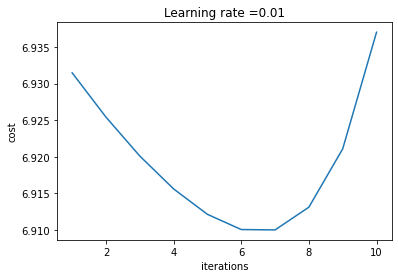

In [17]:
# Plot learning curve (with costs)
history = logreg.get_model_info() 
costs = list(map(lambda x: x*10, history['costs']))
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(history["alpha"]))
plt.show()

This data is probably way too easy for the model, and we are clearly overfitting!!! We can see this by the poor test accuracy: 

In [18]:
logreg.accuracy(X_test,Y_test)

Accuracy: 49.9 %


49.9

Now, let's use different parameter configurations to see if we do better. 

In [19]:
logreg = LogisticRegression() # initalize object
logreg.train_fit(X_train, Y_train, X_test = X_test, Y_test= Y_test, 
                num_iters=20000, alpha=0.01, delta=1e-8, 
                verbose=True, verbose_speed = 100)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.680117
Cost after iteration 200: 0.676371
Cost after iteration 300: 0.674188
Cost after iteration 400: 0.672573
Cost after iteration 500: 0.671231
Cost after iteration 600: 0.670045
Cost after iteration 700: 0.668959
Cost after iteration 800: 0.667945
Cost after iteration 900: 0.666987
Cost after iteration 1000: 0.666072
Cost after iteration 1100: 0.665195
Cost after iteration 1200: 0.664349
Cost after iteration 1300: 0.663532
Cost after iteration 1400: 0.662740
Cost after iteration 1500: 0.661970
Cost after iteration 1600: 0.661220
Cost after iteration 1700: 0.660490
Cost after iteration 1800: 0.659777
Cost after iteration 1900: 0.659079
Cost after iteration 2000: 0.658397
Cost after iteration 2100: 0.657729
Cost after iteration 2200: 0.657074
Cost after iteration 2300: 0.656431
Cost after iteration 2400: 0.655800
Cost after iteration 2500: 0.655180
Cost after iteration 2600: 0.654570
Cost after iteration 2700: 0.653970
Cost

{'X': array([[0.50196078, 0.04705882, 0.33333333, ..., 0.40392157, 0.45098039,
         0.64705882],
        [0.46666667, 0.04313725, 0.34117647, ..., 0.41568627, 0.45882353,
         0.65882353],
        [0.47843137, 0.05882353, 0.36862745, ..., 0.42745098, 0.45490196,
         0.56470588],
        ...,
        [0.99215686, 0.31372549, 0.70196078, ..., 0.70980392, 0.27843137,
         0.65882353],
        [0.99607843, 0.29411765, 0.6745098 , ..., 0.7254902 , 0.30588235,
         0.63137255],
        [0.99215686, 0.25490196, 0.66666667, ..., 0.72156863, 0.30196078,
         0.63921569]]),
 'Y': array([[0, 0, 0, ..., 1, 1, 1]]),
 'alpha': 0.006,
 'b': 0.11219281720421227,
 'costs': [1.7976931348623157e+308,
  0.6931471805599454,
  0.6927177218728601,
  0.6923438722622152,
  0.6919926334823977,
  0.6916582385658014,
  0.6913388730846721,
  0.6910333664311732,
  0.6907407163306911,
  0.6904600147437465,
  0.690190431163394,
  0.6899312045931593,
  0.6896816372491242,
  0.6894410889655997,

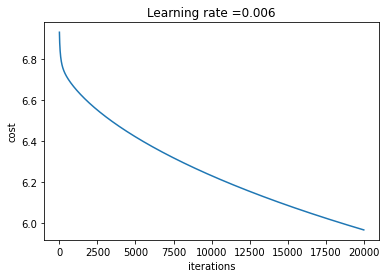

In [20]:
# Plot learning curve (with costs)
history = logreg.get_model_info() 
costs = list(map(lambda x: x*10, history['costs']))
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(history["alpha"]))
plt.show()

In [21]:
logreg.accuracy(X_test,Y_test)

Accuracy: 56.65 %


56.65